In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression
from sklearn import model_selection as ms
from scipy.stats import pearsonr
from sklearn.metrics import make_scorer
from sklearn import metrics
import pickle

rand_st=4

In [2]:
elos_1=pd.read_csv(r'C:\Users\Asus\PredictingRatings\data\elos1.csv')
elos_2=pd.read_csv(r'C:\Users\Asus\PredictingRatings\data\elos2.csv')
elos_3=pd.read_csv(r'C:\Users\Asus\PredictingRatings\data\elos3.csv')
elos_4=pd.read_csv(r'C:\Users\Asus\PredictingRatings\data\elos4.csv')
features_1=pd.read_csv(r'C:\Users\Asus\PredictingRatings\data\features1.csv')
features_2=pd.read_csv(r'C:\Users\Asus\PredictingRatings\data\features2.csv')
features_3=pd.read_csv(r'C:\Users\Asus\PredictingRatings\data\features3.csv')
features_4=pd.read_csv(r'C:\Users\Asus\PredictingRatings\data\features4.csv')

In [3]:
target_mean_1=elos_1['MeanElos']
target_diff_1=elos_1['DiffElos']

target_mean_2=elos_2['MeanElos']
target_diff_2=elos_2['DiffElos']

target_mean_3=elos_3['MeanElos']
target_diff_3=elos_3['DiffElos']

target_mean_4=elos_4['MeanElos']
target_diff_4=elos_4['DiffElos']

In [4]:
features_1.shape, target_mean_1.shape

((4262, 126), (4262,))

In [5]:
def find_mean_error(pred,elos):
    er=0
    count=0
    for ind, val in enumerate(pred):
        er+=abs(elos.iloc[ind,0]-val[0])
        er+=abs(elos.iloc[ind,1]-val[1])
        count+=2
    return round(er/count,3)

def find_abs_error(pred,elos):
    er=0
    for ind, val in enumerate(pred):
        er+=abs(elos.iloc[ind,0]-val[0])
        er+=abs(elos.iloc[ind,1]-val[1])
    return round(er,3)

def find_root_mean_squared_error(pred,elos):
    er=0
    count=0
    for ind, val in enumerate(pred):
        er+=(elos.iloc[ind,0]-val[0])**2
        er+=(elos.iloc[ind,1]-val[1])**2
        count+=2
    return round((er/count)**0.5,3)

### Кластер 1

In [6]:
start1 = time.time()
lr_mean_1= LinearRegression()
lr_mean_1.fit(features_1, target_mean_1)
lr_mean_pred_1 = lr_mean_1.predict(features_1)
full_time1=round(time.time() - start1,3)
print(full_time1, 'c')

0.026 c


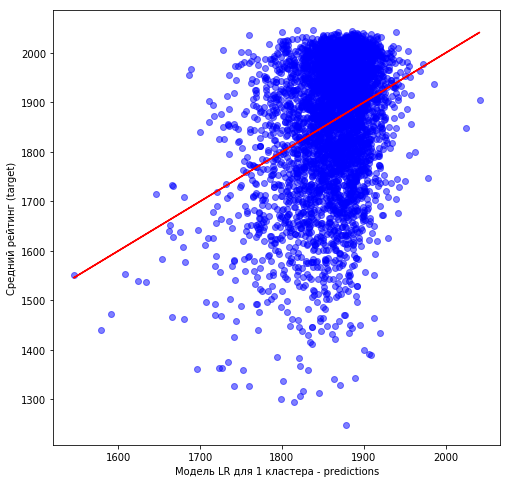

In [7]:
plt.figure(figsize=(8, 8))
plt.scatter(lr_mean_pred_1,target_mean_1, color = 'b',alpha=0.5)
plt.xlabel('Модель LR для 1 кластера - predictions')
plt.ylabel('Средний рейтинг (target)')
# Линия тренда
z = np.polyfit(lr_mean_pred_1,target_mean_1, 1)
p = np.poly1d(z)
plt.plot(lr_mean_pred_1,p(lr_mean_pred_1),"r")
plt.show()

In [8]:
mae1=mae(target_mean_1,lr_mean_pred_1)
print ('MAE = {:.3f}'.format(mae1))
rmse1 = (mse(target_mean_1, lr_mean_pred_1))**0.5
print ('RMSE = {:.3f}'.format(rmse1))
corr_coef1 = pearsonr(target_mean_1, lr_mean_pred_1)
print("Correlation coefficient = {:.3f}".format(corr_coef1[0]))

MAE = 102.981
RMSE = 129.003
Correlation coefficient = 0.310


In [9]:
output = pd.DataFrame([[str(lr_mean_1), mae1,rmse1, corr_coef1[0],full_time1,'Обучение на среднем ЭЛО по кластеру 1']],
                   columns=['Модель', 'MAE','RMSE','Коэффициент корр. Пирсона', 'Время работы (c)', 'Комментарий'])

output.to_excel(r'C:\Users\Asus\PredictingRatings\models\class_results.xlsx',index=False)

In [10]:
start2 = time.time()
lr_diff_1= LinearRegression()
lr_diff_1.fit(features_1, target_diff_1)
lr_diff_pred_1 = lr_diff_1.predict(features_1)
full_time2=round(time.time() - start2,3)
print(full_time2, 'c')

0.032 c


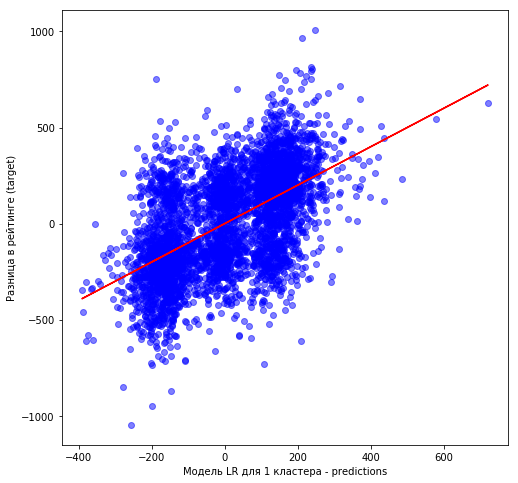

In [11]:
plt.figure(figsize=(8, 8))
plt.scatter(lr_diff_pred_1,target_diff_1, color = 'b',alpha=0.5)
plt.xlabel('Модель LR для 1 кластера - predictions')
plt.ylabel('Разница в рейтинге (target)')
# Линия тренда
z = np.polyfit(lr_diff_pred_1,target_diff_1, 1)
p = np.poly1d(z)
plt.plot(lr_diff_pred_1,p(lr_diff_pred_1),"r")
plt.show()

In [12]:
mae2=mae(target_diff_1,lr_diff_pred_1)
print ('MAE = {:.3f}'.format(mae2))
rmse2 = (mse(target_diff_1, lr_diff_pred_1))**0.5
print ('RMSE = {:.3f}'.format(rmse2))
corr_coef2 = pearsonr(target_diff_1, lr_diff_pred_1)
print("Correlation coefficient = {:.3f}".format(corr_coef2[0]))

MAE = 173.677
RMSE = 218.061
Correlation coefficient = 0.565


In [13]:
output = output.append(pd.Series([str(lr_diff_1), mae2,rmse2, 
                                  corr_coef2[0],full_time2,'Обучение на разнице ЭЛО по начинающим'],
                                 index=output.columns ),
                      ignore_index=True)

output

,Модель,MAE,RMSE,Коэффициент корр. Пирсона,Время работы (c),Комментарий
0,"LinearRegression(copy_X=True, fit_intercept=Tr...",102.980777,129.002684,0.310189,0.026,Обучение на среднем ЭЛО по кластеру 1
1,"LinearRegression(copy_X=True, fit_intercept=Tr...",173.676816,218.061005,0.564917,0.032,Обучение на разнице ЭЛО по начинающим


In [14]:
output.to_excel(r'C:\Users\Asus\PredictingRatings\models\class_results.xlsx',index=False)

In [15]:
white_elos_1 = lr_mean_pred_1 + lr_diff_pred_1/2
black_elos_1 = lr_mean_pred_1-lr_diff_pred_1/2
pred_elos1=list(zip(white_elos_1,black_elos_1))
print(len(pred_elos1))
pred_elos1[:5]

4262


[(1773.2194197576218, 1974.446427071664),
 (1783.5588539735036, 1870.9502597644591),
 (1885.924415149663, 1897.5550444006242),
 (1807.9846710558352, 1931.9902232107554),
 (1917.5761286071668, 1840.2907691984317)]

In [16]:
find_abs_error(pred_elos1,elos_1),find_mean_error(pred_elos1,elos_1),find_root_mean_squared_error(pred_elos1,elos_1)

(1150192.575, 134.936, 168.908)

In [17]:
inner_mae_1=find_mean_error(pred_elos1,elos_1)

In [18]:
errors = pd.DataFrame([['1 Кластер','LinearRegression',
                  find_abs_error(pred_elos1,elos_1),
                  find_mean_error(pred_elos1,elos_1),
                   find_root_mean_squared_error(pred_elos1,elos_1) ]],
                   columns=['Группа','Модель','Абсолютная ошибка', 'MAE','RMSE'])

In [19]:
errors.to_excel(r'C:\Users\Asus\PredictingRatings\models\class_errors.xlsx',index=False)

### Подбор модели для кластера 2

In [20]:
start3 = time.time()
lr_mean_2= LinearRegression()
lr_mean_2.fit(features_2, target_mean_2)
lr_mean_pred_2 = lr_mean_2.predict(features_2)
full_time3=round(time.time() - start3,3)
print(full_time3, 'c')

0.04 c


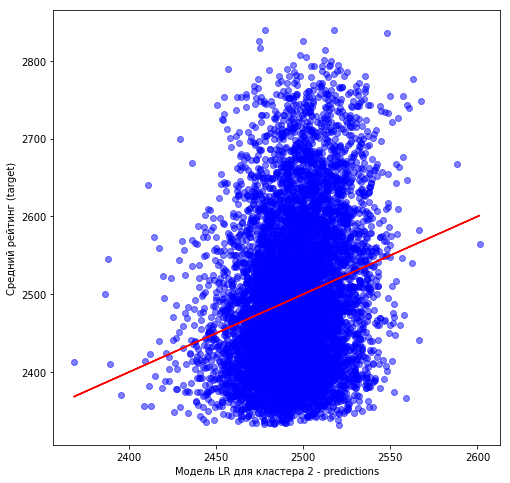

In [21]:
plt.figure(figsize=(8, 8))
plt.scatter(lr_mean_pred_2,target_mean_2, color = 'b',alpha=0.5)
plt.xlabel('Модель LR для кластера 2 - predictions')
plt.ylabel('Средний рейтинг (target)')
# Линия тренда
z = np.polyfit(lr_mean_pred_2,target_mean_2, 1)
p = np.poly1d(z)
plt.plot(lr_mean_pred_2,p(lr_mean_pred_2),"r")
plt.show()

In [22]:
mae4=mae(target_mean_2,lr_mean_pred_2)
print ('MAE = {:.3f}'.format(mae4))
rmse4 = (mse(target_mean_2, lr_mean_pred_2))**0.5
print ('RMSE = {:.3f}'.format(rmse4))
corr_coef4 = pearsonr(target_mean_2, lr_mean_pred_2)
print("Correlation coefficient = {:.3f}".format(corr_coef4[0]))

MAE = 77.387
RMSE = 95.798
Correlation coefficient = 0.218


In [23]:
output = output.append(pd.Series([str(lr_mean_2), mae4,rmse4, 
                                  corr_coef4[0],full_time3,'Обучение на среднем ЭЛО по 1 кластеру'],
                                 index=output.columns ),
                      ignore_index=True)

output

,Модель,MAE,RMSE,Коэффициент корр. Пирсона,Время работы (c),Комментарий
0,"LinearRegression(copy_X=True, fit_intercept=Tr...",102.980777,129.002684,0.310189,0.026,Обучение на среднем ЭЛО по кластеру 1
1,"LinearRegression(copy_X=True, fit_intercept=Tr...",173.676816,218.061005,0.564917,0.032,Обучение на разнице ЭЛО по начинающим
2,"LinearRegression(copy_X=True, fit_intercept=Tr...",77.387126,95.797568,0.217573,0.040,Обучение на среднем ЭЛО по 1 кластеру


In [24]:
start5 = time.time()
lr_diff_2= LinearRegression()
lr_diff_2.fit(features_2, target_diff_2)
lr_diff_pred_2 = lr_diff_2.predict(features_2)
full_time5=round(time.time() - start5,3)
print(full_time5, 'c')

0.039 c


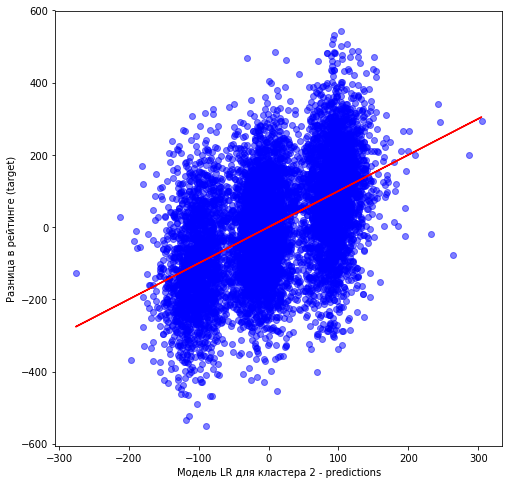

In [25]:
plt.figure(figsize=(8, 8))
plt.scatter(lr_diff_pred_2,target_diff_2, color = 'b',alpha=0.5)
plt.xlabel('Модель LR для кластера 2 - predictions')
plt.ylabel('Разница в рейтинге (target)')
# Линия тренда
z = np.polyfit(lr_diff_pred_2,target_diff_2, 1)
p = np.poly1d(z)
plt.plot(lr_diff_pred_2,p(lr_diff_pred_2),"r")
plt.show()

In [26]:
mae5=mae(target_diff_2,lr_diff_pred_2)
print ('MAE = {:.3f}'.format(mae5))
rmse5 = (mse(target_diff_2, lr_diff_pred_2))**0.5
print ('RMSE = {:.3f}'.format(rmse5))
corr_coef5 = pearsonr(target_diff_2, lr_diff_pred_2)
print("Correlation coefficient = {:.3f}".format(corr_coef5[0]))

MAE = 108.609
RMSE = 135.854
Correlation coefficient = 0.502


In [27]:
output = output.append(pd.Series([str(lr_diff_2), mae5,rmse5, 
                                  corr_coef5[0],full_time5,'Обучение на разнице в  ЭЛО по 2 кластеру'],
                                 index=output.columns ),
                      ignore_index=True)

output

,Модель,MAE,RMSE,Коэффициент корр. Пирсона,Время работы (c),Комментарий
0,"LinearRegression(copy_X=True, fit_intercept=Tr...",102.980777,129.002684,0.310189,0.026,Обучение на среднем ЭЛО по кластеру 1
1,"LinearRegression(copy_X=True, fit_intercept=Tr...",173.676816,218.061005,0.564917,0.032,Обучение на разнице ЭЛО по начинающим
2,"LinearRegression(copy_X=True, fit_intercept=Tr...",77.387126,95.797568,0.217573,0.040,Обучение на среднем ЭЛО по 1 кластеру
3,"LinearRegression(copy_X=True, fit_intercept=Tr...",108.608625,135.853982,0.501589,0.039,Обучение на разнице в ЭЛО по 2 кластеру


In [28]:
white_elos_2 = lr_mean_pred_2 + lr_diff_pred_2/2
black_elos_2 = lr_mean_pred_2-lr_diff_pred_2/2
pred_elos2=list(zip(white_elos_2,black_elos_2))
print(len(pred_elos2))
pred_elos2[:5]

8219


[(2527.822589382355, 2529.70637339635),
 (2541.8842001747435, 2410.3905836591002),
 (2416.107409845016, 2548.550323250264),
 (2563.6329823084493, 2445.6686039526835),
 (2504.6237451491484, 2541.9160802513557)]

In [29]:
find_abs_error(pred_elos2,elos_2),find_mean_error(pred_elos2,elos_2), find_root_mean_squared_error(pred_elos2,elos_2)

(1566282.369, 95.284, 117.437)

In [30]:
errors = errors.append(pd.Series(['2 кластер','LinearRegression',
                  find_abs_error(pred_elos2,elos_2),
                  find_mean_error(pred_elos2,elos_2),
                   find_root_mean_squared_error(pred_elos2,elos_2)],index=errors.columns) ,ignore_index=True)

errors.to_excel(r'C:\Users\Asus\PredictingRatings\models\class_errors.xlsx',index=False)
errors

,Группа,Модель,Абсолютная ошибка,MAE,RMSE
0,1 Кластер,LinearRegression,1150192.575,134.936,168.908
1,2 кластер,LinearRegression,1566282.369,95.284,117.437


In [31]:
inner_mae_2 = find_mean_error(pred_elos2,elos_2)

### Подбор модели для 3 кластера

In [32]:
start6 = time.time()
lr_mean_3= LinearRegression()
lr_mean_3.fit(features_3, target_mean_3)
lr_mean_pred_3 = lr_mean_3.predict(features_3)
full_time6=round(time.time() - start6,3)
print(full_time6, 'c')

0.04 c


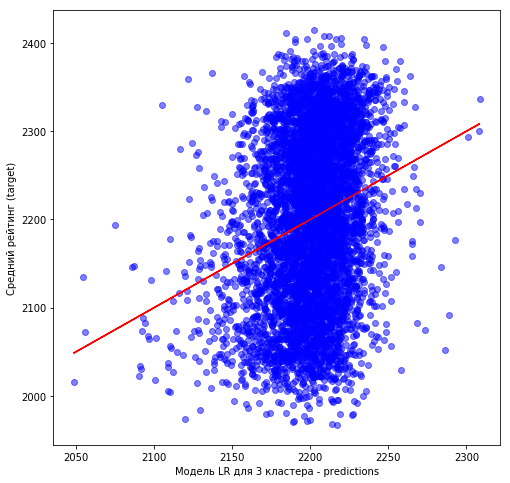

In [33]:
plt.figure(figsize=(8, 8))
plt.scatter(lr_mean_pred_3,target_mean_3, color = 'b',alpha=0.5)
plt.xlabel('Модель LR для 3 кластера - predictions')
plt.ylabel('Средний рейтинг (target)')
# Линия тренда
z = np.polyfit(lr_mean_pred_3,target_mean_3, 1)
p = np.poly1d(z)
plt.plot(lr_mean_pred_3,p(lr_mean_pred_3),"r")
plt.show()

In [34]:
mae6=mae(target_mean_3,lr_mean_pred_3)
print ('MAE = {:.3f}'.format(mae6))
rmse6 = (mse(target_mean_3, lr_mean_pred_3))**0.5
print ('RMSE = {:.3f}'.format(rmse6))
corr_coef6 = pearsonr(target_mean_3, lr_mean_pred_3)
print("Correlation coefficient = {:.3f}".format(corr_coef6[0]))

MAE = 80.617
RMSE = 94.975
Correlation coefficient = 0.238


In [35]:
output = output.append(pd.Series([str(lr_mean_3), mae6,rmse6, 
                                  corr_coef6[0],full_time6,'Обучение на среднем ЭЛО по 3 кластеру'],
                                 index=output.columns ),
                      ignore_index=True)
output.to_excel(r'C:\Users\Asus\PredictingRatings\models\class_results.xlsx',index=False)
output

,Модель,MAE,RMSE,Коэффициент корр. Пирсона,Время работы (c),Комментарий
0,"LinearRegression(copy_X=True, fit_intercept=Tr...",102.980777,129.002684,0.310189,0.026,Обучение на среднем ЭЛО по кластеру 1
1,"LinearRegression(copy_X=True, fit_intercept=Tr...",173.676816,218.061005,0.564917,0.032,Обучение на разнице ЭЛО по начинающим
2,"LinearRegression(copy_X=True, fit_intercept=Tr...",77.387126,95.797568,0.217573,0.040,Обучение на среднем ЭЛО по 1 кластеру
3,"LinearRegression(copy_X=True, fit_intercept=Tr...",108.608625,135.853982,0.501589,0.039,Обучение на разнице в ЭЛО по 2 кластеру
4,"LinearRegression(copy_X=True, fit_intercept=Tr...",80.616755,94.974990,0.237813,0.040,Обучение на среднем ЭЛО по 3 кластеру


In [36]:
start7 = time.time()
lr_diff_3= LinearRegression()
lr_diff_3.fit(features_3, target_diff_3)
lr_diff_pred_3 = lr_diff_3.predict(features_3)
full_time7=round(time.time() - start7,3)
print(full_time7, 'c')

0.028 c


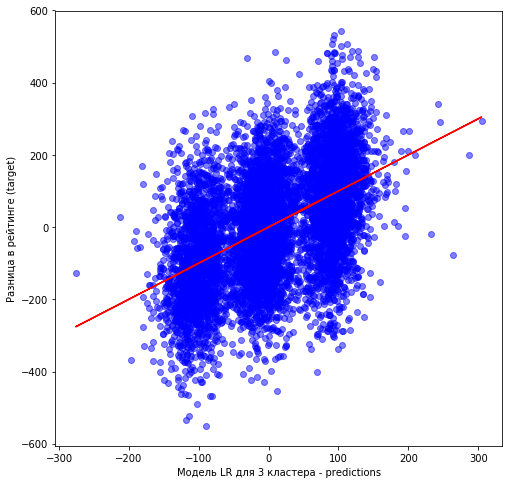

In [37]:
plt.figure(figsize=(8, 8))
plt.scatter(lr_diff_pred_2,target_diff_2, color = 'b',alpha=0.5)
plt.xlabel('Модель LR для 3 кластера - predictions')
plt.ylabel('Разница в рейтинге (target)')
# Линия тренда
z = np.polyfit(lr_diff_pred_2,target_diff_2, 1)
p = np.poly1d(z)
plt.plot(lr_diff_pred_2,p(lr_diff_pred_2),"r")
plt.show()

In [38]:
mae7=mae(target_diff_3,lr_diff_pred_3)
print ('MAE = {:.3f}'.format(mae7))
rmse7 = (mse(target_diff_3, lr_diff_pred_3))**0.5
print ('RMSE = {:.3f}'.format(rmse7))
corr_coef7 = pearsonr(target_diff_3, lr_diff_pred_3)
print("Correlation coefficient = {:.3f}".format(corr_coef7[0]))

MAE = 102.869
RMSE = 132.827
Correlation coefficient = 0.390


In [39]:
output = output.append(pd.Series([str(lr_diff_3), mae7,rmse7, 
                                  corr_coef7[0],full_time7,'Обучение на разнице в  ЭЛО по 3 кластеру'],
                                 index=output.columns ),
                      ignore_index=True)

output.to_excel(r'C:\Users\Asus\PredictingRatings\models\class_results.xlsx',index=False)

output

,Модель,MAE,RMSE,Коэффициент корр. Пирсона,Время работы (c),Комментарий
0,"LinearRegression(copy_X=True, fit_intercept=Tr...",102.980777,129.002684,0.310189,0.026,Обучение на среднем ЭЛО по кластеру 1
1,"LinearRegression(copy_X=True, fit_intercept=Tr...",173.676816,218.061005,0.564917,0.032,Обучение на разнице ЭЛО по начинающим
2,"LinearRegression(copy_X=True, fit_intercept=Tr...",77.387126,95.797568,0.217573,0.040,Обучение на среднем ЭЛО по 1 кластеру
3,"LinearRegression(copy_X=True, fit_intercept=Tr...",108.608625,135.853982,0.501589,0.039,Обучение на разнице в ЭЛО по 2 кластеру
4,"LinearRegression(copy_X=True, fit_intercept=Tr...",80.616755,94.974990,0.237813,0.040,Обучение на среднем ЭЛО по 3 кластеру
5,"LinearRegression(copy_X=True, fit_intercept=Tr...",102.869006,132.827010,0.390109,0.028,Обучение на разнице в ЭЛО по 3 кластеру


In [40]:
white_elos_3 = lr_mean_pred_3 + lr_diff_pred_3/2
black_elos_3 = lr_mean_pred_3-lr_diff_pred_3/2
pred_elos3=list(zip(white_elos_3,black_elos_3))
print(len(pred_elos3))
pred_elos3[:5]

5962


[(2325.8880550456324, 2065.9725779031087),
 (2346.708227214409, 2042.6670499894735),
 (2304.714600265225, 2123.758464679247),
 (2335.3697034247703, 2080.7133913507873),
 (2342.3635614928885, 2082.3068347126477)]

In [41]:
find_abs_error(pred_elos3,elos_3),find_mean_error(pred_elos3,elos_3), find_root_mean_squared_error(pred_elos3,elos_3)

(1127526.174, 94.559, 115.893)

In [42]:
errors = errors.append(pd.Series(['3 кластер','LinearRegression',
                  find_abs_error(pred_elos3,elos_3),
                  find_mean_error(pred_elos3,elos_3),
                   find_root_mean_squared_error(pred_elos3,elos_3)],index=errors.columns) ,ignore_index=True)

errors.to_excel(r'C:\Users\Asus\PredictingRatings\models\class_errors.xlsx',index=False,sheet_name='Errors')
errors

,Группа,Модель,Абсолютная ошибка,MAE,RMSE
0,1 Кластер,LinearRegression,1150192.575,134.936,168.908
1,2 кластер,LinearRegression,1566282.369,95.284,117.437
2,3 кластер,LinearRegression,1127526.174,94.559,115.893


In [43]:
inner_mae_3=find_mean_error(pred_elos3,elos_3)

### Подбор модели для 4 кластера

In [44]:
start8 = time.time()
lr_mean_4= LinearRegression()
lr_mean_4.fit(features_4, target_mean_4)
lr_mean_pred_4 = lr_mean_4.predict(features_4)
full_time8=round(time.time() - start8,3)
print(full_time8, 'c')

0.028 c


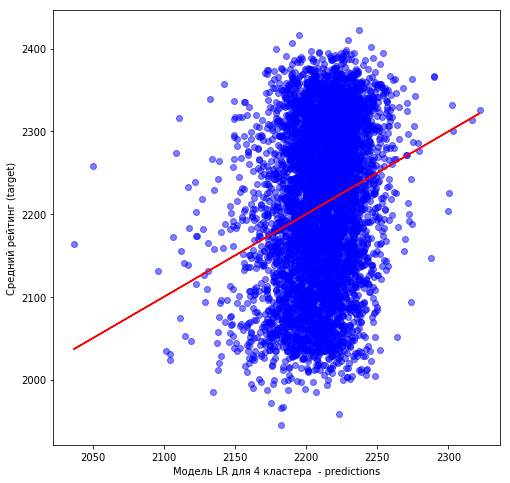

In [45]:
plt.figure(figsize=(8, 8))
plt.scatter(lr_mean_pred_4,target_mean_4, color = 'b',alpha=0.5)
plt.xlabel('Модель LR для 4 кластера  - predictions')
plt.ylabel('Средний рейтинг (target)')
# Линия тренда
z = np.polyfit(lr_mean_pred_4,target_mean_4, 1)
p = np.poly1d(z)
plt.plot(lr_mean_pred_4,p(lr_mean_pred_4),"r")
plt.show()

In [46]:
mae8=mae(target_mean_4,lr_mean_pred_4)
print ('MAE = {:.3f}'.format(mae8))
rmse8 = (mse(target_mean_4, lr_mean_pred_4))**0.5
print ('RMSE = {:.3f}'.format(rmse8))
corr_coef8 = pearsonr(target_mean_4, lr_mean_pred_4)
print("Correlation coefficient = {:.3f}".format(corr_coef8[0]))

MAE = 80.320
RMSE = 94.830
Correlation coefficient = 0.229


In [47]:
output = output.append(pd.Series([str(lr_mean_4), mae8,rmse8, 
                                  corr_coef8[0],full_time8,'Обучение на среднем ЭЛО по 4 кластеру'],
                                 index=output.columns ),
                      ignore_index=True)

output.to_excel(r'C:\Users\Asus\PredictingRatings\models\class_results.xlsx',index=False)

output

,Модель,MAE,RMSE,Коэффициент корр. Пирсона,Время работы (c),Комментарий
0,"LinearRegression(copy_X=True, fit_intercept=Tr...",102.980777,129.002684,0.310189,0.026,Обучение на среднем ЭЛО по кластеру 1
1,"LinearRegression(copy_X=True, fit_intercept=Tr...",173.676816,218.061005,0.564917,0.032,Обучение на разнице ЭЛО по начинающим
2,"LinearRegression(copy_X=True, fit_intercept=Tr...",77.387126,95.797568,0.217573,0.040,Обучение на среднем ЭЛО по 1 кластеру
3,"LinearRegression(copy_X=True, fit_intercept=Tr...",108.608625,135.853982,0.501589,0.039,Обучение на разнице в ЭЛО по 2 кластеру
4,"LinearRegression(copy_X=True, fit_intercept=Tr...",80.616755,94.974990,0.237813,0.040,Обучение на среднем ЭЛО по 3 кластеру
5,"LinearRegression(copy_X=True, fit_intercept=Tr...",102.869006,132.827010,0.390109,0.028,Обучение на разнице в ЭЛО по 3 кластеру
6,"LinearRegression(copy_X=True, fit_intercept=Tr...",80.319818,94.829941,0.228683,0.028,Обучение на среднем ЭЛО по 4 кластеру


In [48]:
start9 = time.time()
lr_diff_4= LinearRegression()
lr_diff_4.fit(features_4, target_diff_4)
lr_diff_pred_4 = lr_diff_4.predict(features_4)
full_time9=round(time.time() - start9,3)
print(full_time9, 'c')

0.037 c


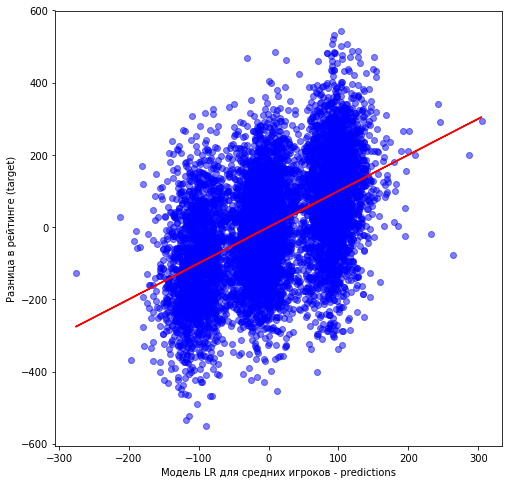

In [49]:
plt.figure(figsize=(8, 8))
plt.scatter(lr_diff_pred_2,target_diff_2, color = 'b',alpha=0.5)
plt.xlabel('Модель LR для средних игроков - predictions')
plt.ylabel('Разница в рейтинге (target)')
# Линия тренда
z = np.polyfit(lr_diff_pred_2,target_diff_2, 1)
p = np.poly1d(z)
plt.plot(lr_diff_pred_2,p(lr_diff_pred_2),"r")
plt.show()

In [50]:
mae9=mae(target_diff_4,lr_diff_pred_4)
print ('MAE = {:.3f}'.format(mae7))
rmse9 = (mse(target_diff_4, lr_diff_pred_4))**0.5
print ('RMSE = {:.3f}'.format(rmse9))
corr_coef9 = pearsonr(target_diff_4, lr_diff_pred_4)
print("Correlation coefficient = {:.3f}".format(corr_coef9[0]))

MAE = 102.869
RMSE = 134.630
Correlation coefficient = 0.405


In [51]:
output = output.append(pd.Series([str(lr_diff_4), mae9,rmse9, 
                                  corr_coef9[0],full_time9,'Обучение на разнице в  ЭЛО по 4 кластеру'],
                                 index=output.columns ),
                      ignore_index=True)

output.to_excel(r'C:\Users\Asus\PredictingRatings\models\class_results.xlsx',index=False)

output

,Модель,MAE,RMSE,Коэффициент корр. Пирсона,Время работы (c),Комментарий
0,"LinearRegression(copy_X=True, fit_intercept=Tr...",102.980777,129.002684,0.310189,0.026,Обучение на среднем ЭЛО по кластеру 1
1,"LinearRegression(copy_X=True, fit_intercept=Tr...",173.676816,218.061005,0.564917,0.032,Обучение на разнице ЭЛО по начинающим
2,"LinearRegression(copy_X=True, fit_intercept=Tr...",77.387126,95.797568,0.217573,0.040,Обучение на среднем ЭЛО по 1 кластеру
3,"LinearRegression(copy_X=True, fit_intercept=Tr...",108.608625,135.853982,0.501589,0.039,Обучение на разнице в ЭЛО по 2 кластеру
4,"LinearRegression(copy_X=True, fit_intercept=Tr...",80.616755,94.974990,0.237813,0.040,Обучение на среднем ЭЛО по 3 кластеру
5,"LinearRegression(copy_X=True, fit_intercept=Tr...",102.869006,132.827010,0.390109,0.028,Обучение на разнице в ЭЛО по 3 кластеру
6,"LinearRegression(copy_X=True, fit_intercept=Tr...",80.319818,94.829941,0.228683,0.028,Обучение на среднем ЭЛО по 4 кластеру
7,"LinearRegression(copy_X=True, fit_intercept=Tr...",103.741893,134.630404,0.404880,0.037,Обучение на разнице в ЭЛО по 4 кластеру


In [52]:
white_elos_4 = lr_mean_pred_4 + lr_diff_pred_4/2
black_elos_4 = lr_mean_pred_4-lr_diff_pred_4/2
pred_elos4=list(zip(white_elos_4,black_elos_4))
print(len(pred_elos4))
pred_elos4[:5]

5812


[(2126.1842659250046, 2355.542192630712),
 (2069.7868536648657, 2323.540352935054),
 (2072.680660680046, 2220.5946020470033),
 (2055.0524625707176, 2339.455434243544),
 (2113.8085586942707, 2279.3442768694085)]

In [53]:
find_abs_error(pred_elos4,elos_4),find_mean_error(pred_elos4,elos_4),find_root_mean_squared_error(pred_elos4,elos_4)

(1099642.476, 94.601, 116.295)

In [54]:
errors = errors.append(pd.Series(['4 кластер','LinearRegression',
                  find_abs_error(pred_elos4,elos_4),
                  find_mean_error(pred_elos4,elos_4),
                   find_root_mean_squared_error(pred_elos4,elos_4)],index=errors.columns) ,ignore_index=True)

errors.to_excel(r'C:\Users\Asus\PredictingRatings\models\class_errors.xlsx',index=False)
errors

,Группа,Модель,Абсолютная ошибка,MAE,RMSE
0,1 Кластер,LinearRegression,1150192.575,134.936,168.908
1,2 кластер,LinearRegression,1566282.369,95.284,117.437
2,3 кластер,LinearRegression,1127526.174,94.559,115.893
3,4 кластер,LinearRegression,1099642.476,94.601,116.295


In [55]:
inner_mae_4=find_mean_error(pred_elos4,elos_4)

In [56]:
lr_mae=(inner_mae_4+inner_mae_3+inner_mae_2+inner_mae_1)/4
lr_mae

104.845

In [57]:
lr_abs=(find_abs_error(pred_elos1,elos_1)+
        find_abs_error(pred_elos2,elos_2)+
        find_abs_error(pred_elos3,elos_3)+
        find_abs_error(pred_elos4,elos_4))/4
lr_abs

1235910.8985000001

In [58]:
lr_rmse=(find_root_mean_squared_error(pred_elos1,elos_1)+
         find_root_mean_squared_error(pred_elos2,elos_2)+
         find_root_mean_squared_error(pred_elos3,elos_3)+
         find_root_mean_squared_error(pred_elos4,elos_4))/4
lr_rmse

129.63324999999998

In [59]:
errors = errors.append(pd.Series(['Общая ошибка','LinearRegression',
                  lr_abs,
                  lr_mae,
                lr_rmse],index=errors.columns) ,ignore_index=True)

errors.to_excel(r'C:\Users\Asus\PredictingRatings\models\class_errors.xlsx',index=False)
errors

,Группа,Модель,Абсолютная ошибка,MAE,RMSE
0,1 Кластер,LinearRegression,1.150193e+06,134.936,168.90800
1,2 кластер,LinearRegression,1.566282e+06,95.284,117.43700
2,3 кластер,LinearRegression,1.127526e+06,94.559,115.89300
3,4 кластер,LinearRegression,1.099642e+06,94.601,116.29500
4,Общая ошибка,LinearRegression,1.235911e+06,104.845,129.63325
